In [1]:
import pandas as pd
import random
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Sample data for generating the dataset
event_types = ['Conference', 'Concert', 'Workshop', 'Expo']
locations = ['A', 'B', 'C', 'D', 'E']
weather_conditions = ['Sunny', 'Rainy', 'Cloudy']

# Generate random data for the dataset
event_ids = range(1, 10001)
event_names = [f'Event {i}' for i in event_ids]
event_types = [random.choice(event_types) for _ in event_ids]
# Set a start date and generate random dates within a specific range
start_date = datetime(2022, 1, 1)
end_date = datetime(2024, 4, 30)
event_dates = [start_date + timedelta(days=random.randint(1, (end_date - start_date).days)) for _ in event_ids]
locations = [random.choice(locations) for _ in event_ids]
ticket_prices = [random.randint(10, 100) for _ in event_ids]
weather_conditions = [random.choice(weather_conditions) for _ in event_ids]
attendance_counts = [random.randint(50, 500) for _ in event_ids]

# Create a DataFrame using the generated data
df = pd.DataFrame({
    'Event_ID': event_ids,
    'Event_Name': event_names,
    'Event_Type': event_types,
    'Event_Date': event_dates,
    'Location': locations,
    'Ticket_Price': ticket_prices,
    'Weather_Condition': weather_conditions,
    'Attendance_Count': attendance_counts
})

# Filter the DataFrame to show only data until April 2024
df = df[df['Event_Date'] <= end_date]

# Add a column for the day of the week
df['Day_of_Week'] = df['Event_Date'].apply(lambda x: x.strftime('%A'))

# Save the DataFrame to a CSV file
# df.to_csv('events_dataset.csv', index=False)


In [3]:
df = pd.read_csv('events_dataset.csv')          

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Event_ID           10000 non-null  int64 
 1   Event_Name         10000 non-null  object
 2   Event_Type         10000 non-null  object
 3   Event_Date         10000 non-null  object
 4   Location           10000 non-null  object
 5   Ticket_Price       10000 non-null  int64 
 6   Weather_Condition  10000 non-null  object
 7   Attendance_Count   10000 non-null  int64 
 8   Day_of_Week        10000 non-null  object
dtypes: int64(3), object(6)
memory usage: 703.3+ KB


In [5]:
df.head()

,Event_ID,Event_Name,Event_Type,Event_Date,Location,Ticket_Price,Weather_Condition,Attendance_Count,Day_of_Week
0,1,Event 1,Conference,2024-02-24,C,48,Rainy,76,Saturday
1,2,Event 2,Concert,2022-01-02,A,73,Cloudy,206,Sunday
2,3,Event 3,Expo,2023-10-28,B,46,Cloudy,297,Saturday
3,4,Event 4,Conference,2023-03-19,E,22,Sunny,354,Sunday
4,5,Event 5,Concert,2022-04-29,E,72,Rainy,330,Friday


In [6]:
# df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

Event_ID             0
Event_Name           0
Event_Type           0
Event_Date           0
Location             0
Ticket_Price         0
Weather_Condition    0
Attendance_Count     0
Day_of_Week          0
dtype: int64

In [8]:
df['Event_Date'] = pd.to_datetime(df['Event_Date'])
df['Month'] = df['Event_Date'].apply(lambda x: x.strftime('%B'))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Event_ID           10000 non-null  int64         
 1   Event_Name         10000 non-null  object        
 2   Event_Type         10000 non-null  object        
 3   Event_Date         10000 non-null  datetime64[ns]
 4   Location           10000 non-null  object        
 5   Ticket_Price       10000 non-null  int64         
 6   Weather_Condition  10000 non-null  object        
 7   Attendance_Count   10000 non-null  int64         
 8   Day_of_Week        10000 non-null  object        
 9   Month              10000 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 781.4+ KB


In [10]:
df.describe()


,Event_ID,Event_Date,Ticket_Price,Attendance_Count
count,10000.00000,10000,10000.00000,10000.000000
mean,5000.50000,2023-03-01 02:51:21.600000256,54.42020,275.102400
min,1.00000,2022-01-02 00:00:00,10.00000,50.000000
25%,2500.75000,2022-07-31 00:00:00,32.00000,161.000000
50%,5000.50000,2023-02-28 00:00:00,54.00000,276.000000
75%,7500.25000,2023-09-26 06:00:00,77.00000,389.000000
max,10000.00000,2024-04-30 00:00:00,100.00000,500.000000
std,2886.89568,NaN,26.06564,130.640727


C:\Users\parth\AppData\Local\Temp\ipykernel_6532\3671363675.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Event_Type', y='Attendance_Count', data=df, estimator='mean', ci=None)


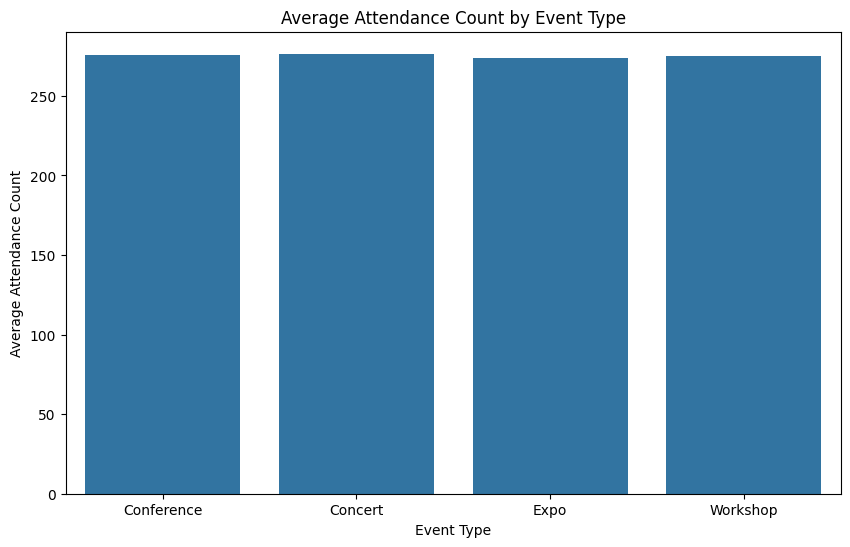

In [11]:
# plot the mean of attendance count by event type
plt.figure(figsize=(10, 6))
sns.barplot(x='Event_Type', y='Attendance_Count', data=df, estimator='mean', ci=None)
plt.title('Average Attendance Count by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Average Attendance Count')
plt.show()


C:\Users\parth\AppData\Local\Temp\ipykernel_6532\4280018323.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y='Attendance_Count', data=df, estimator='mean', ci=None)


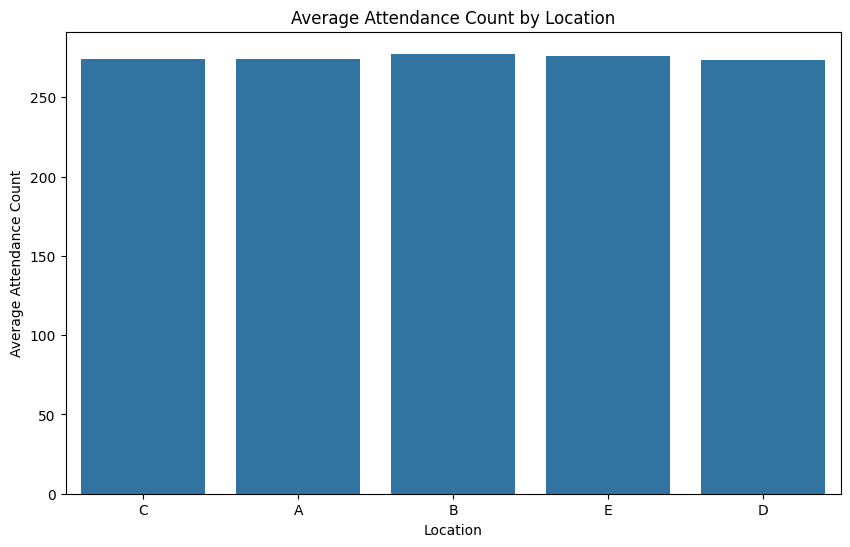

In [12]:
# same for location
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Attendance_Count', data=df, estimator='mean', ci=None)
plt.title('Average Attendance Count by Location')
plt.xlabel('Location')  
plt.ylabel('Average Attendance Count')
plt.show()

C:\Users\parth\AppData\Local\Temp\ipykernel_6532\227395504.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Weather_Condition', y='Attendance_Count', data=df, estimator='mean', ci=None)


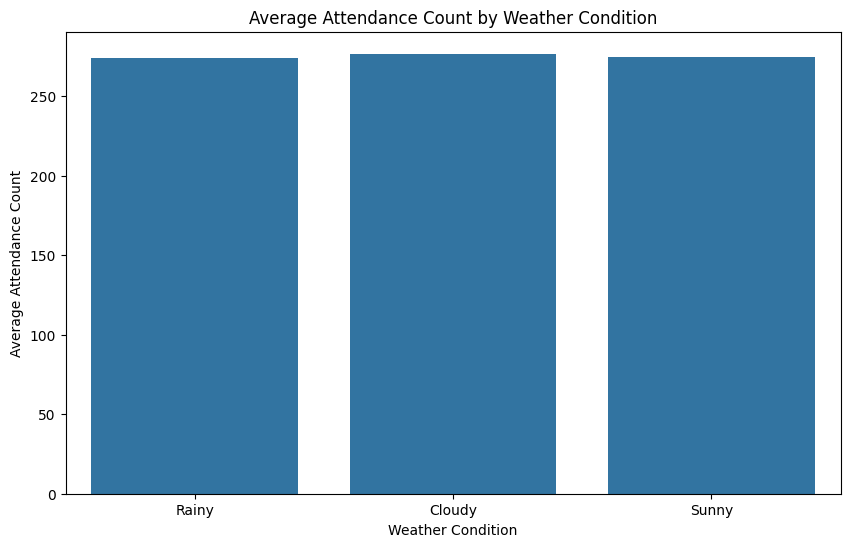

In [13]:
# similar for weather condition

plt.figure(figsize=(10, 6))
sns.barplot(x='Weather_Condition', y='Attendance_Count', data=df, estimator='mean', ci=None)
plt.title('Average Attendance Count by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Attendance Count')
plt.show()


C:\Users\parth\AppData\Local\Temp\ipykernel_6532\2458835588.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Day_of_Week', y='Attendance_Count', data=df, estimator='mean', ci=None)


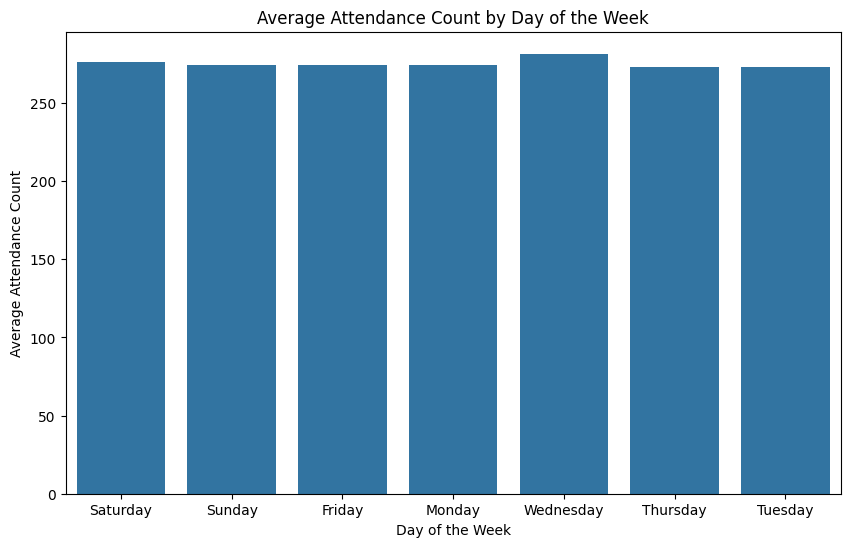

In [14]:
# similar for day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_of_Week', y='Attendance_Count', data=df, estimator='mean', ci=None)
plt.title('Average Attendance Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Attendance Count')
plt.show()


C:\Users\parth\AppData\Local\Temp\ipykernel_6532\407729008.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Month', y='Attendance_Count', data=df, estimator='mean', ci=None, order=months)


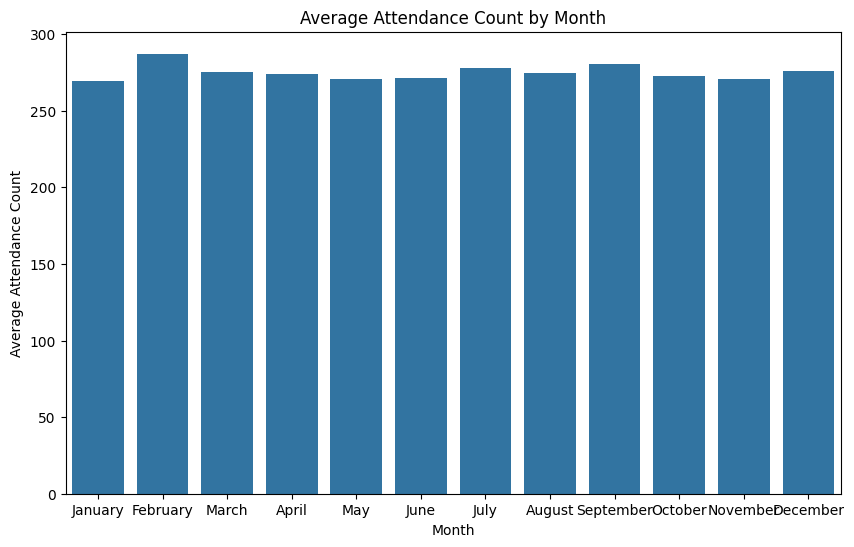

In [15]:
# similar for month in ascending order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Attendance_Count', data=df, estimator='mean', ci=None, order=months)
plt.title('Average Attendance Count by Month')
plt.xlabel('Month')
plt.ylabel('Average Attendance Count')  
plt.show()

